In [96]:
import pandas as pd
df = pd.read_csv('dados/MICRODADOS_ENEM_2022 copy 2.csv', sep=';', encoding='latin1', decimal=',')
df.head()

#nrows para ler menos dados na hora dos testes = não demorar muito para carregar

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [134]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN',
       'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q003', 'Q004', 'Q005', 'Q006',

In [135]:
df = df.drop(columns=['IN_TREINEIRO'])


KeyError: "['IN_TREINEIRO'] not found in axis"

In [136]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN',
       'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q003', 'Q004', 'Q005', 'Q006',

In [137]:
prova_columns = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT']
condition = ~df[prova_columns].isin([0, 2]).any(axis=1)
df= df[condition]

In [138]:
df['TP_PRESENCA_CH'].unique()

array([1])

In [139]:
redacao_columns = ['TP_STATUS_REDACAO']
condition = ~df[redacao_columns].isin([2,3,4,5,6,7,8,9]).any(axis=1)
df= df[condition]

In [140]:
df['TP_STATUS_REDACAO'].unique()

array([1.])

In [141]:
print(df['Q006'].unique())

['B' 'A' 'E' 'C' 'G' 'D' 'F' 'I' 'H' 'K' 'L' 'J' 'Q' 'P' 'O' 'M' 'N']


In [142]:
df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']] = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].astype(float)
mean_data = df.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean().reset_index()
mean_data

,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,A,461.944304,487.616554,473.299855,476.671278,576.951986
1,B,470.737159,501.430090,491.545660,495.551117,605.240587
2,C,484.631347,521.133804,513.844599,523.858551,630.055888
3,D,493.028080,531.063326,523.959619,539.686701,646.511738
4,E,501.575340,540.333362,532.693012,555.708450,665.284595
5,F,510.080588,549.039899,540.103005,571.606411,681.645120
6,G,516.273232,555.051425,545.673599,581.334431,694.035430
7,H,525.293107,563.677424,552.665860,595.885194,712.866927
8,I,533.986683,571.582887,559.159940,609.879145,727.615909
9,J,538.701123,575.988190,562.801491,618.227862,737.143843


In [143]:
print(mean_data.columns)


Index(['Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO'],
      dtype='object')


In [144]:
df_notas_renda = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q006','NU_NOTA_REDACAO']]

mean_data = df_notas_renda.groupby('Q006').mean().reset_index()

melted_data = df_notas_renda.melt(id_vars='Q006', value_vars=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO'], var_name='Prova', value_name='Nota')


In [145]:
df_notas_renda = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q006','NU_NOTA_REDACAO']]
df_notas_renda

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q006,NU_NOTA_REDACAO
2,421.1,546.0,498.8,565.3,B,760.0
3,490.7,388.6,357.8,416.0,A,320.0
7,398.1,427.3,400.2,404.9,B,440.0
9,467.5,461.0,466.7,435.3,B,360.0
11,458.7,539.8,488.2,456.8,B,940.0
...,...,...,...,...,...,...
3476095,444.5,504.4,489.5,423.6,C,580.0
3476097,536.1,633.2,584.0,596.3,D,740.0
3476098,487.6,495.6,545.5,597.4,B,580.0
3476099,512.5,524.8,546.8,432.0,B,520.0


In [146]:
melted_data = df_notas_renda.melt(id_vars='Q006', value_vars=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO'], var_name='Prova', value_name='Nota')
melted_data

,Q006,Prova,Nota
0,B,NU_NOTA_CN,421.1
1,A,NU_NOTA_CN,490.7
2,B,NU_NOTA_CN,398.1
3,B,NU_NOTA_CN,467.5
4,B,NU_NOTA_CN,458.7
...,...,...,...
11228240,C,NU_NOTA_REDACAO,580.0
11228241,D,NU_NOTA_REDACAO,740.0
11228242,B,NU_NOTA_REDACAO,580.0
11228243,B,NU_NOTA_REDACAO,520.0


In [147]:
melted_data['Nota'] = melted_data['Nota'].astype(float)
melted_data


,Q006,Prova,Nota
0,B,NU_NOTA_CN,421.1
1,A,NU_NOTA_CN,490.7
2,B,NU_NOTA_CN,398.1
3,B,NU_NOTA_CN,467.5
4,B,NU_NOTA_CN,458.7
...,...,...,...
11228240,C,NU_NOTA_REDACAO,580.0
11228241,D,NU_NOTA_REDACAO,740.0
11228242,B,NU_NOTA_REDACAO,580.0
11228243,B,NU_NOTA_REDACAO,520.0


In [148]:
renda_mapping = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.212,00',
    'C': 'De R$ 1.212,01 até R$ 1.818,00',
    'D': 'De R$ 1.818,01 até R$ 2.424,00',
    'E': 'De R$ 2.424,01 até R$ 3.030,00',
    'F': 'De R$ 3.030,01 até R$ 3.636,00',
    'G': 'De R$ 3.636,01 até R$ 4.848,00',
    'H': 'De R$ 4.848,01 até R$ 6.060,00',
    'I': 'De R$ 6.060,01 até R$ 7.272,00',
    'J': 'De R$ 7.272,01 até R$ 8.484,00',
    'K': 'De R$ 8.484,01 até R$ 9.696,00',
    'L': 'De R$ 9.696,01 até R$ 10.908,00',
    'M': 'De R$ 10.908,01 até R$ 12.120,00',
    'N': 'De R$ 12.120,01 até R$ 14.544,00',
    'O': 'De R$ 14.544,01 até R$ 18.180,00',
    'P': 'De R$ 18.180,01 até R$ 24.240,00',
    'Q': 'Acima de R$ 24.240,00.'
}

# Aplicar o mapeamento na coluna 'Q006' de 'melted_data'
melted_data['Q006'] = melted_data['Q006'].replace(renda_mapping)


In [149]:
prova_mapping = {
    'NU_NOTA_CN': 'Nota da prova de Ciências da Natureza',
    'NU_NOTA_CH': 'Nota da prova de Ciências Humanas',
    'NU_NOTA_LC': 'Nota da prova de Linguagens e Códigos',
    'NU_NOTA_MT': 'Nota da prova de Matemática',
    'NU_NOTA_REDACAO': 'Nota da prova de redação'
}

# Substitua os valores na coluna 'Prova'
melted_data['Prova'] = melted_data['Prova'].replace(prova_mapping)

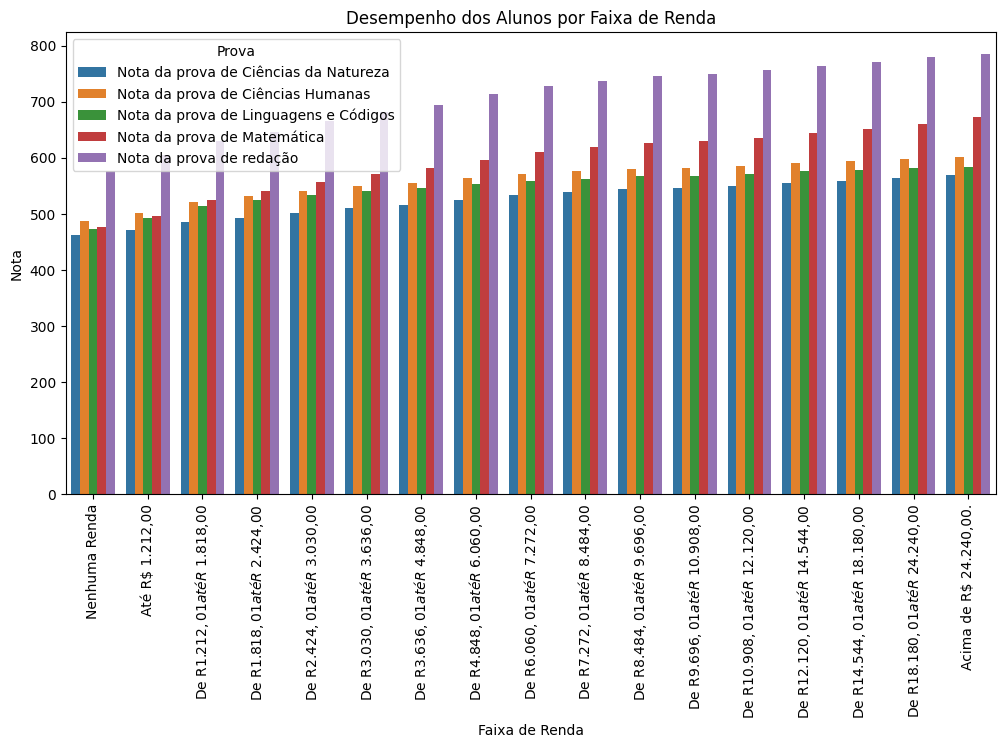

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
renda_mapping = [
    'Nenhuma Renda',
    'Até R$ 1.212,00',
    'De R$ 1.212,01 até R$ 1.818,00',
    'De R$ 1.818,01 até R$ 2.424,00',
    'De R$ 2.424,01 até R$ 3.030,00',
    'De R$ 3.030,01 até R$ 3.636,00',
    'De R$ 3.636,01 até R$ 4.848,00',
    'De R$ 4.848,01 até R$ 6.060,00',
    'De R$ 6.060,01 até R$ 7.272,00',
    'De R$ 7.272,01 até R$ 8.484,00',
    'De R$ 8.484,01 até R$ 9.696,00',
    'De R$ 9.696,01 até R$ 10.908,00',
    'De R$ 10.908,01 até R$ 12.120,00',
    'De R$ 12.120,01 até R$ 14.544,00',
    'De R$ 14.544,01 até R$ 18.180,00',
    'De R$ 18.180,01 até R$ 24.240,00',
    'Acima de R$ 24.240,00.'
]
plt.figure(figsize=(12, 6))
sns.barplot(x='Q006', y='Nota', hue='Prova', data=melted_data, ci=None, order=renda_mapping)
plt.title('Desempenho dos Alunos por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Nota')
plt.xticks(rotation=90)
plt.show() 

In [114]:
#Não vamos utilizar esse gráfico por isso não está em ordem crescente

In [115]:
df['NU_NOTA_CN'] = pd.to_numeric(df['NU_NOTA_CN'], errors='coerce')
df['NU_NOTA_CH'] = pd.to_numeric(df['NU_NOTA_CH'], errors='coerce')
df['NU_NOTA_LC'] = pd.to_numeric(df['NU_NOTA_LC'], errors='coerce')
df['NU_NOTA_MT'] = pd.to_numeric(df['NU_NOTA_MT'], errors='coerce')
df['NU_NOTA_REDACAO'] = pd.to_numeric(df['NU_NOTA_REDACAO'], errors='coerce')

In [116]:
notas = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']]

In [117]:
mean_values = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean()
print(mean_values)

NU_NOTA_CN         498.021254
NU_NOTA_CH         533.114615
NU_NOTA_LC         523.240613
NU_NOTA_MT         546.361673
NU_NOTA_REDACAO    656.726194
dtype: float64


In [118]:
sigma = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].std()
sigma

NU_NOTA_CN          72.027987
NU_NOTA_CH          78.322370
NU_NOTA_LC          74.475975
NU_NOTA_MT         115.855285
NU_NOTA_REDACAO    158.959709
dtype: float64

In [119]:
mean_data = df.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean()
mean_data 

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q006,,,,,
A,461.944304,487.616554,473.299855,476.671278,576.951986
B,470.737159,501.430090,491.545660,495.551117,605.240587
C,484.631347,521.133804,513.844599,523.858551,630.055888
D,493.028080,531.063326,523.959619,539.686701,646.511738
E,501.575340,540.333362,532.693012,555.708450,665.284595
F,510.080588,549.039899,540.103005,571.606411,681.645120
G,516.273232,555.051425,545.673599,581.334431,694.035430
H,525.293107,563.677424,552.665860,595.885194,712.866927
I,533.986683,571.582887,559.159940,609.879145,727.615909


In [120]:
d_data = (mean_data - mean_values) / sigma
d_data

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q006,,,,,
A,-0.500874,-0.580908,-0.670562,-0.601530,-0.501852
B,-0.378799,-0.404540,-0.425573,-0.438569,-0.323891
C,-0.185899,-0.152968,-0.126162,-0.194235,-0.167780
D,-0.069323,-0.026190,0.009654,-0.057615,-0.064258
E,0.049343,0.092167,0.126919,0.080676,0.053840
F,0.167426,0.203330,0.226414,0.217899,0.156763
G,0.253401,0.280084,0.301211,0.301866,0.234709
H,0.378629,0.390218,0.395097,0.427460,0.353176
I,0.499326,0.491153,0.482294,0.548248,0.445960


In [121]:
melted_data = d_data.reset_index().melt(id_vars='Q006', var_name='Prova', value_name='Coeficiente d')
melted_data 

,Q006,Prova,Coeficiente d
0,A,NU_NOTA_CN,-0.500874
1,B,NU_NOTA_CN,-0.378799
2,C,NU_NOTA_CN,-0.185899
3,D,NU_NOTA_CN,-0.069323
4,E,NU_NOTA_CN,0.049343
...,...,...,...
80,M,NU_NOTA_REDACAO,0.629218
81,N,NU_NOTA_REDACAO,0.676148
82,O,NU_NOTA_REDACAO,0.717468
83,P,NU_NOTA_REDACAO,0.774804


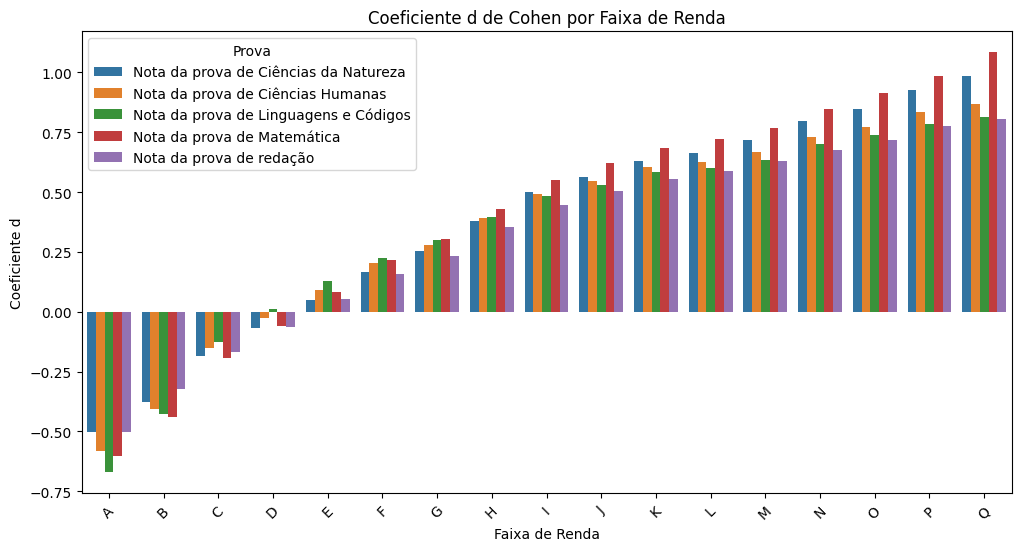

In [122]:
melted_data['Q006'] = melted_data['Q006'].replace(renda_mapping)
melted_data['Prova'] = melted_data['Prova'].replace(prova_mapping)
plt.figure(figsize=(12, 6))
sns.barplot(x='Q006', y='Coeficiente d', hue='Prova', data=melted_data)
plt.title('Coeficiente d de Cohen por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Coeficiente d')
plt.xticks(rotation=45)
plt.show()

In [123]:
#Um valor de d perto de 0 sugere que não há diferença significativa entre os grupos.
#Um valor de d positivo sugere que as escolas públicas têm um desempenho melhor.
#Um valor de d negativo sugere que as escolas particulares têm um desempenho melhor.

In [124]:
publica = df[df['TP_DEPENDENCIA_ADM_ESC'].isin([1, 2, 3])]
particular = df[df['TP_DEPENDENCIA_ADM_ESC'] == 4]
publica

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
40,210056717205,2022,5,F,1,3,1,2,0,2,...,A,A,A,B,A,A,C,A,A,B
57,210056292241,2022,2,M,1,3,1,2,0,2,...,A,A,A,C,A,A,E,A,C,B
59,210054772114,2022,3,F,1,3,1,2,0,2,...,A,A,A,C,A,A,A,A,A,B
67,210055580862,2022,3,M,1,1,1,2,0,2,...,A,A,A,C,B,A,D,B,A,B
68,210055092856,2022,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476074,210056744855,2022,4,M,0,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,B
3476086,210056738981,2022,2,M,1,1,1,2,0,2,...,B,A,B,C,B,A,D,A,B,B
3476093,210055806830,2022,3,F,1,1,1,2,0,2,...,A,A,A,B,A,A,E,A,B,B
3476098,210055668087,2022,2,M,0,3,1,2,0,2,...,A,A,A,B,A,A,C,A,A,B


In [125]:
mean_publica = publica[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()
mean_particular = particular[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()
sigma_publica = publica[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].std()
sigma_particular = particular[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].std()

In [126]:
import numpy as np
d_cohen = (mean_publica - mean_particular) / np.sqrt((sigma_publica**2 + sigma_particular**2) / 2)
d_cohen

NU_NOTA_CN        -0.831167
NU_NOTA_CH        -0.846073
NU_NOTA_LC        -0.768275
NU_NOTA_MT        -0.844000
NU_NOTA_REDACAO   -0.966569
dtype: float64

In [127]:
prova_mapping = {
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_MT': 'Matemática',
    'NU_NOTA_REDACAO': 'Redação'
}

melted_data['Prova'] = melted_data['Prova'].replace(prova_mapping)

In [128]:
d_cohen_df = d_cohen.reset_index().rename(columns={'index': 'Prova', 0: 'd'})
d_cohen_df

,Prova,d
0,NU_NOTA_CN,-0.831167
1,NU_NOTA_CH,-0.846073
2,NU_NOTA_LC,-0.768275
3,NU_NOTA_MT,-0.844000
4,NU_NOTA_REDACAO,-0.966569


In [129]:
d_cohen_df = d_cohen.reset_index().rename(columns={'index': 'Prova', 0: 'd'})
d_cohen_df['Prova'] = d_cohen_df['Prova'].replace(prova_mapping)

d_cohen_df

,Prova,d
0,Ciências da Natureza,-0.831167
1,Ciências Humanas,-0.846073
2,Linguagens e Códigos,-0.768275
3,Matemática,-0.844000
4,Redação,-0.966569


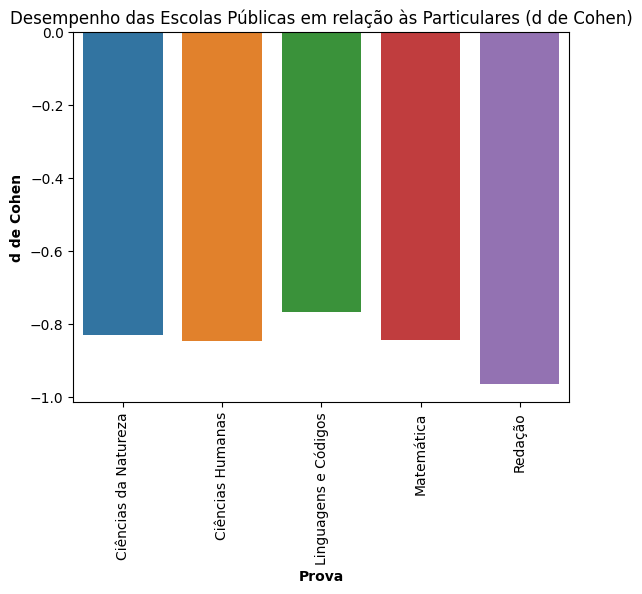

In [130]:
sns.barplot(x='Prova', y='d', data=d_cohen_df)
plt.title('Desempenho das Escolas Públicas em relação às Particulares (d de Cohen)')
plt.xlabel('Prova',fontweight='bold')
plt.ylabel('d de Cohen',fontweight='bold')
plt.xticks(rotation=90)
plt.show() 